In [2]:
####Import Necessary Libraries

import pandas as pd
import os

In [3]:
### Merging 12 months of sales data into single CSV file
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [4]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.') ]  #Ignore hidden files
all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)

In [5]:
#Read in Updated Dataframe

In [8]:
all_data = pd.read_csv("all_data_copy.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [9]:
#Clean up the data!

#The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [10]:
#Drop rows of NAN

In [12]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Remove all NaN data
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [14]:
#Augment data with additional columns
#Add month column

In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

/var/folders/k_/h9kyxcp12td3ywby5wd6yt200000gn/T/ipykernel_82496/1369745424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]


ValueError: invalid literal for int() with base 10: 'Or'

In [16]:
#Get rid of text in order date column

In [17]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [19]:
#Data Exploration!
#Question 1: What was the best month for sales? How much was earned that month?

In [20]:
#Add a sels column

In [21]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

TypeError: can't multiply sequence by non-int of type 'str'

In [22]:
#Make columns correct type

In [23]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

In [25]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
95,295751,AAA Batteries (4-pack),1,2.99,12/29/19 11:03,"922 Hickory St, Los Angeles, CA 90001",12,2.99
96,295752,Google Phone,1,600.00,12/11/19 12:29,"341 Forest St, Dallas, TX 75001",12,600.00
97,295753,34in Ultrawide Monitor,1,379.99,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,379.99
98,295753,Lightning Charging Cable,1,14.95,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,14.95


In [28]:
#total sales and total order per month

In [29]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [30]:
#plot a bar graph for above data

In [31]:
results = all_data.groupby('Month').sum()

<function matplotlib.pyplot.show(close=None, block=None)>

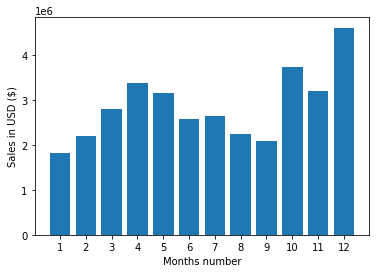

In [33]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months number')
plt.show

In [34]:
#Question 2: What city sold the most product?

In [35]:
#Add city column

In [36]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [37]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


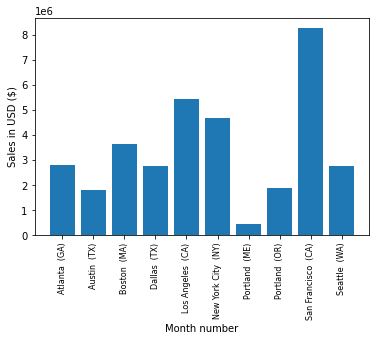

In [38]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [39]:
#Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [45]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


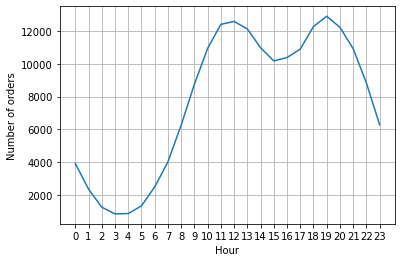

In [46]:
hours = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [47]:
#Question 4: What products are most often sold together?

In [54]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,1
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,1
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,1
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,1
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles (CA),11,37,1
186822,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,600.00,New York City (NY),12,6,1
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,11.95,New York City (NY),12,6,1
186842,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",6,700.00,New York City (NY),22,21,1


In [55]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df2 = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

/var/folders/k_/h9kyxcp12td3ywby5wd6yt200000gn/T/ipykernel_82496/3377944568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [56]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

#combination of 2 product
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [57]:
# for 3 product combination

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [58]:
# for 4 product combination

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 4)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


In [59]:
# Question 5: What product sold the most? Why do you think it sold the most?

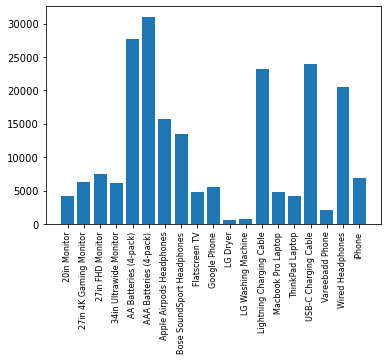

In [60]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

/var/folders/k_/h9kyxcp12td3ywby5wd6yt200000gn/T/ipykernel_82496/136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/var/folders/k_/h9kyxcp12td3ywby5wd6yt200000gn/T/ipykernel_82496/136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


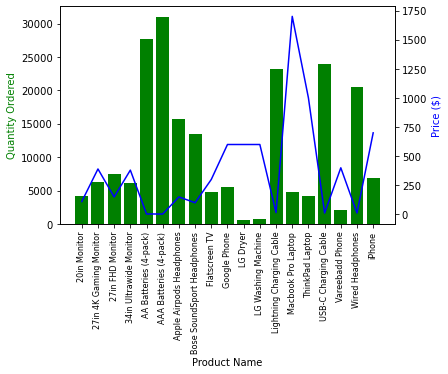

In [61]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()